In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
data_path = os.path.join("C:\\Users\\shivang kumar m\\data_science", "DryBeanDataset")

def load_xlsx_data():
    xlsx_path = os.path.join(data_path, "Dry_Bean_Dataset.xlsx")
    return pd.read_excel(xlsx_path)

dry_bean = load_xlsx_data()

#copying dataset to analyse
dry_bean_copy = dry_bean.copy()

#Adding color_code for different type of beans in alphabetical order
color_code = {"BARBUNYA":0, "BOMBAY":1, "CALI":2, "DERMASON":3, "HOROZ":4, "SEKER":5, "SIRA":6}
c_code = []
for i in dry_bean_copy.index:
     c_code.append(color_code[dry_bean_copy["Class"][i]])
dry_bean_copy["Color_code"] = c_code

#Removing duplicate rows
dry_bean_copy.drop_duplicates(inplace=True)

dry_bean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
 17  Color_code  

In [2]:
#Univariate analysis
#1. Numerical analysis 
dry_bean_copy.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Color_code
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078,3.530311
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347,1.832994
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720,2.000000
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393,3.000000
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891,5.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


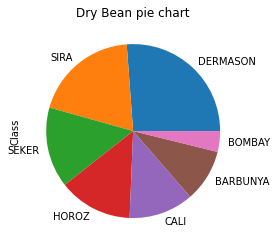

In [15]:
#2. Pie chart for different beans
pie_chart = dry_bean_copy["Class"].value_counts(normalize=True)
pie_chart.plot.pie()
plt.title("Dry Bean pie chart")
plt.show()

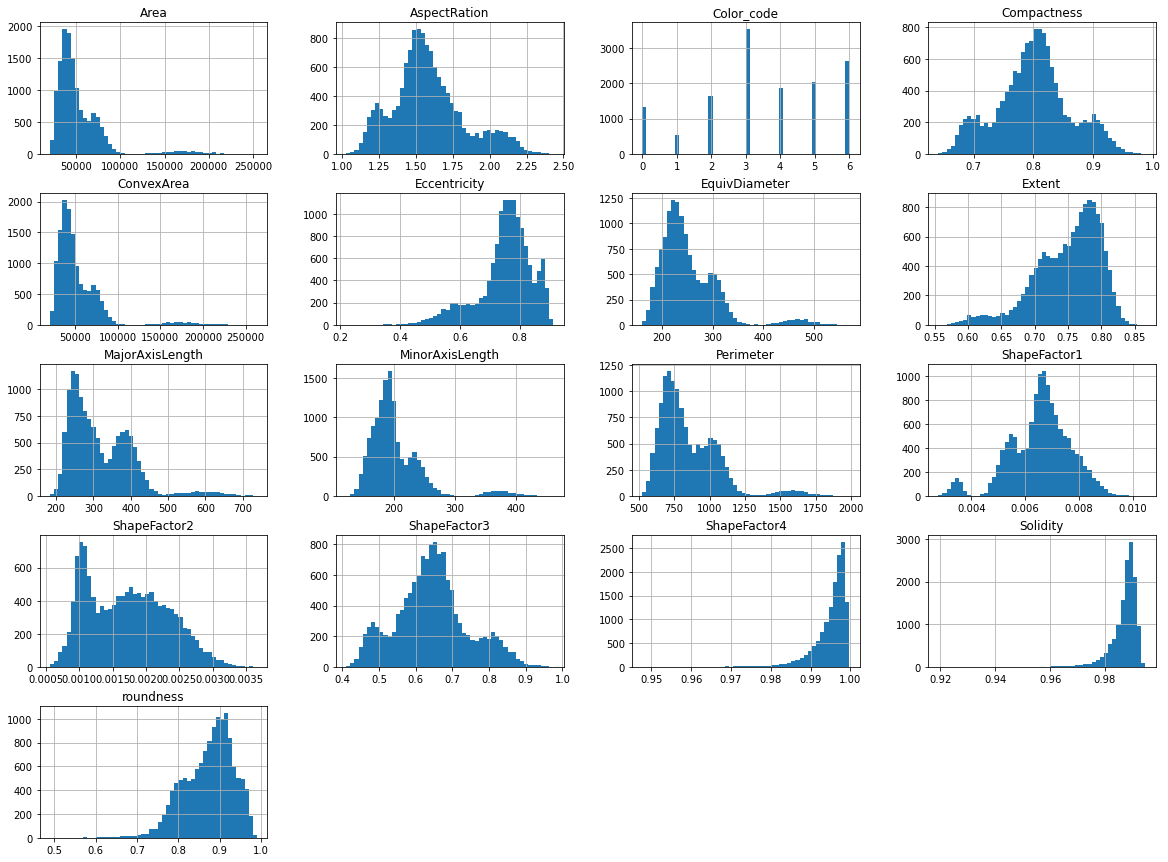

In [16]:
#3. Histograph
dry_bean_copy.hist(bins=50, figsize=(20, 15))
plt.show()

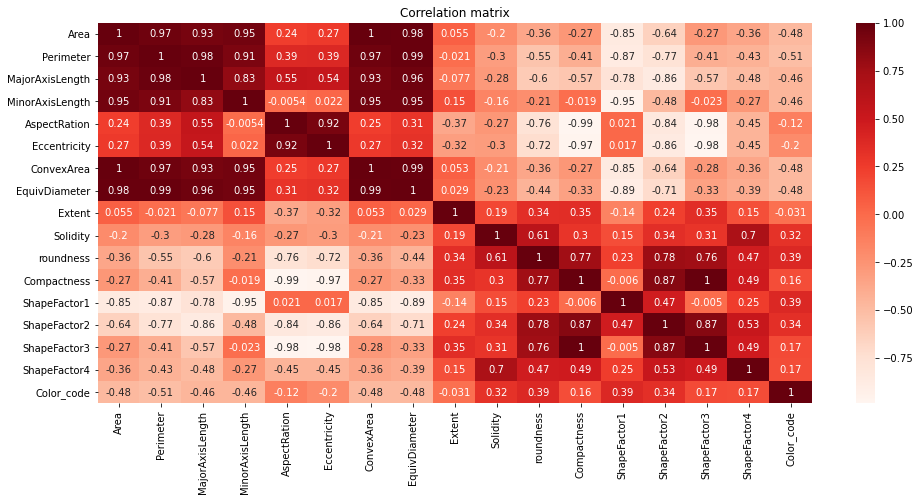

In [11]:
#Bivariate analysis
#1. Coorelation matrix
cor = dry_bean_copy.corr()
plt.figure(figsize=(16, 7))
sns.heatmap(cor, annot= True, cmap="Reds", )
plt.title("Correlation matrix")
plt.show()

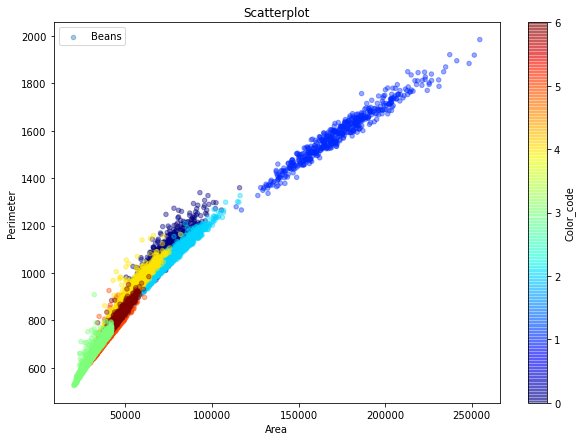

In [10]:
#2. Scatter plot for area and parameter
fig,ax=plt.subplots()
dry_bean_copy.plot(kind="scatter", x="Area", y="Perimeter", label="Beans", figsize=(10, 7), alpha=0.4, c="Color_code", cmap=plt.get_cmap("jet"), colorbar=True,ax=ax)
plt.legend()
plt.title("Scatterplot")
plt.show()

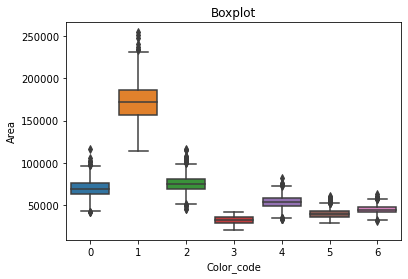

In [8]:
#3. Numeric-categorical anlysis
sns.boxplot(dry_bean_copy["Color_code"], dry_bean_copy["Area"])
plt.title("Boxplot")
plt.show()